In [11]:
#import the library needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

In [13]:
from sklearn import metrics

In [14]:
#Read CSV file
data=pd.read_csv(r"C:\Users\vijiv\OneDrive\Desktop\GUVI notes\csv file\train.csv")
data.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [15]:
#To find the total number of rows and columns in the dataset
data.shape

(100000, 28)

In [16]:
#To find the datatype of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [17]:
# To find the null values in the column
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [18]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [19]:
# checking whether there is a duplicate value in the data
data.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS 

<Axes: >

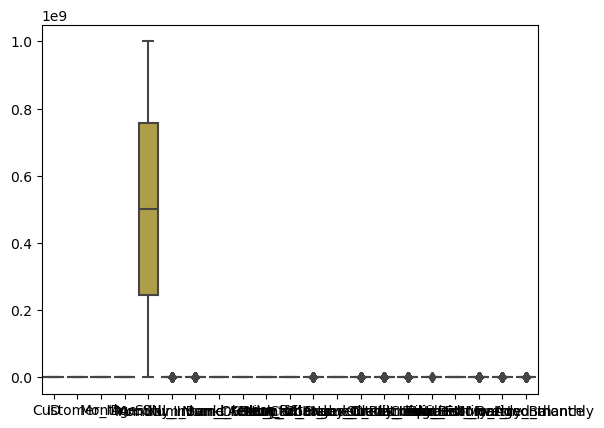

In [20]:
sns.boxplot(data)#check the outliers

In [21]:
data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [22]:
#checking credit score with occupation tab
pd.crosstab(data['Occupation'],data['Credit_Score'],normalize='index')

Credit_Score,Good,Poor,Standard
Occupation,,,
Accountant,0.178677,0.302046,0.519276
Architect,0.180686,0.271835,0.547479
Developer,0.180060,0.286310,0.533631
Doctor,0.177223,0.274665,0.548112
Engineer,0.184149,0.305070,0.510781
Entrepreneur,0.178249,0.305806,0.515945
Journalist,0.191860,0.281518,0.526622
Lawyer,0.177424,0.276917,0.545660
Manager,0.185012,0.288557,0.526430


[Text(0.5, 1.0, 'Credit Scores Based on Occupation')]

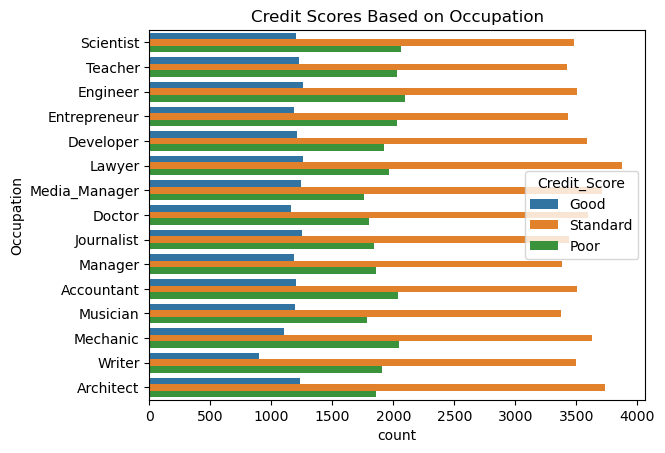

In [23]:
sns.countplot(y='Occupation', hue='Credit_Score', data=data).set(title="Credit Scores Based on Occupation")

[Text(0.5, 1.0, 'Credit Scores Based on Annual Income')]

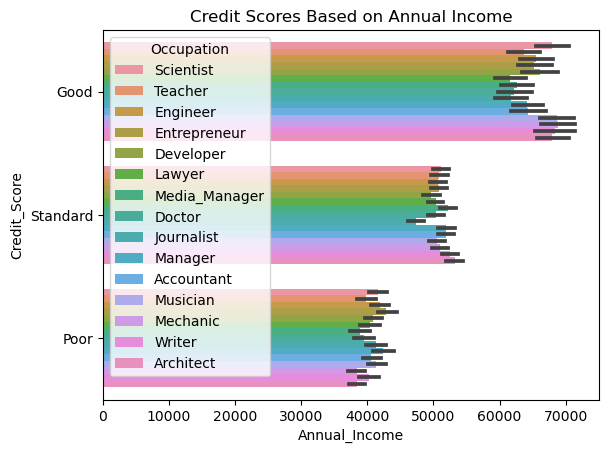

In [24]:
sns.barplot(x='Annual_Income', y='Credit_Score',hue='Occupation', data=data).set(title="Credit Scores Based on Annual Income")
            

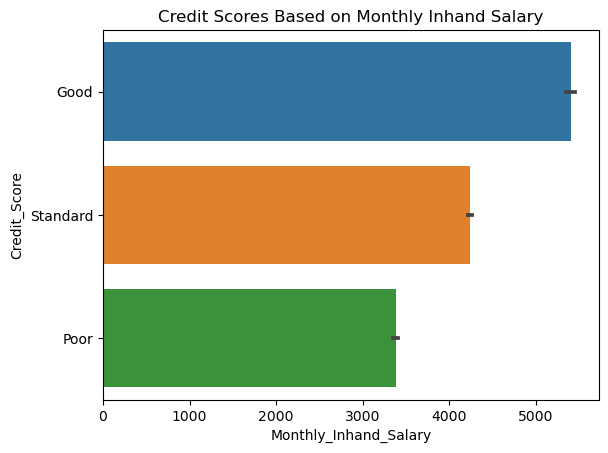

In [25]:
ax=sns.barplot(x='Monthly_Inhand_Salary', y='Credit_Score', data=data).set(title="Credit Scores Based on Monthly Inhand Salary")

In [ ]:
OCCUPATION who is getting monthly_inhand_salary of 5000 dollar and more getting high chance of getting loan

[Text(0.5, 1.0, 'Credit Scores Based on Number of Bank Accounts')]

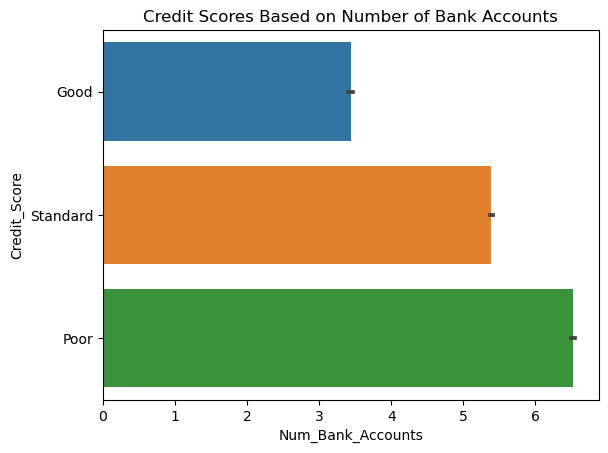

In [26]:
sns.barplot(x='Num_Bank_Accounts', y='Credit_Score', data=data).set(title="Credit Scores Based on Number of Bank Accounts")

[Text(0.5, 1.0, 'Credit Scores Based on Number of credit cards')]

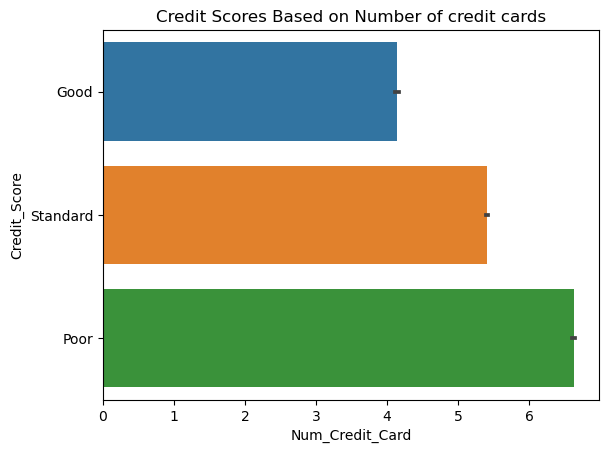

In [27]:
sns.barplot(x='Num_Credit_Card', y='Credit_Score', data=data).set(title="Credit Scores Based on Number of credit cards")

[Text(0.5, 1.0, 'Credit Scores Based on Interest_Rate')]

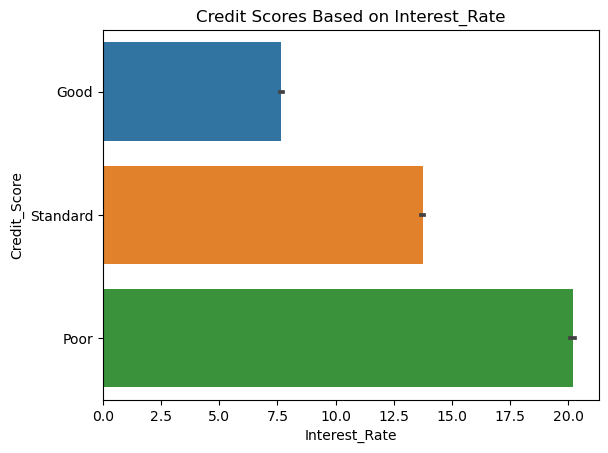

In [28]:
sns.barplot(x='Interest_Rate', y='Credit_Score', data=data).set(title="Credit Scores Based on Interest_Rate")

[Text(0.5, 1.0, 'Credit Scores Based on Number of loan taken by Person')]

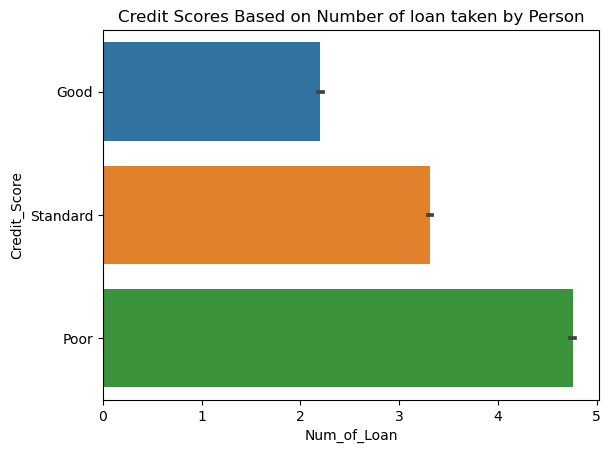

In [29]:
sns.barplot(x='Num_of_Loan', y='Credit_Score', data=data).set(title="Credit Scores Based on Number of loan taken by Person")

[Text(0.5, 1.0, 'Credit Scores Based on Delay from due date')]

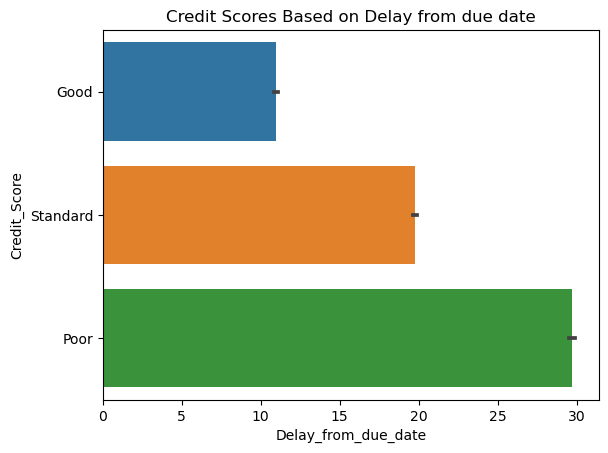

In [30]:
sns.barplot(x='Delay_from_due_date', y='Credit_Score', data=data).set(title="Credit Scores Based on Delay from due date")

[Text(0.5, 1.0, 'Credit Scores Based on Number of Delayed Payment')]

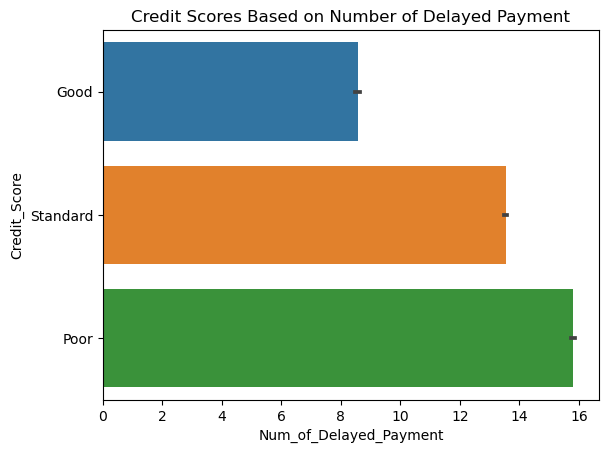

In [31]:
sns.barplot(x='Num_of_Delayed_Payment', y='Credit_Score', data=data).set(title="Credit Scores Based on Number of Delayed Payment")

[Text(0.5, 1.0, 'Credit Scores Based on Outstanding_Debt')]

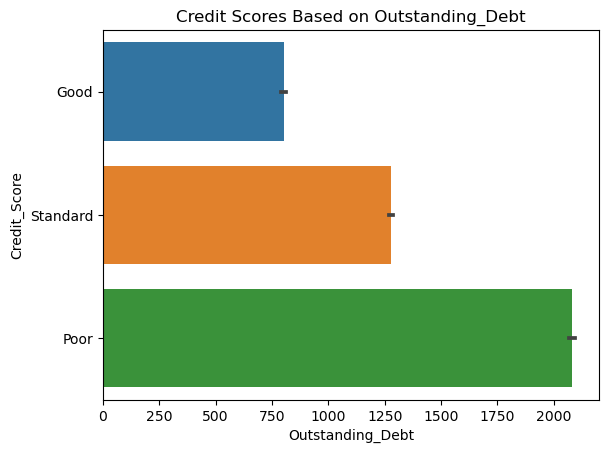

In [32]:
sns.barplot(x='Outstanding_Debt', y='Credit_Score', data=data).set(title="Credit Scores Based on Outstanding_Debt")

[Text(0.5, 1.0, 'Credit Scores Based on Credit Utilization Ratio')]

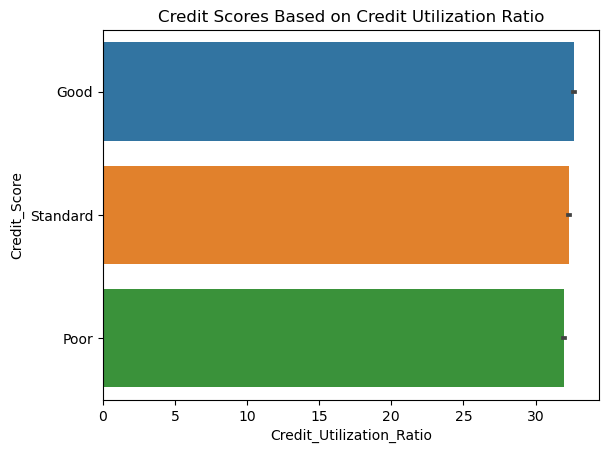

In [33]:
sns.barplot(x='Credit_Utilization_Ratio', y='Credit_Score', data=data).set(title="Credit Scores Based on Credit Utilization Ratio")

[Text(0.5, 1.0, 'Credit Scores Based on Credit History Age')]

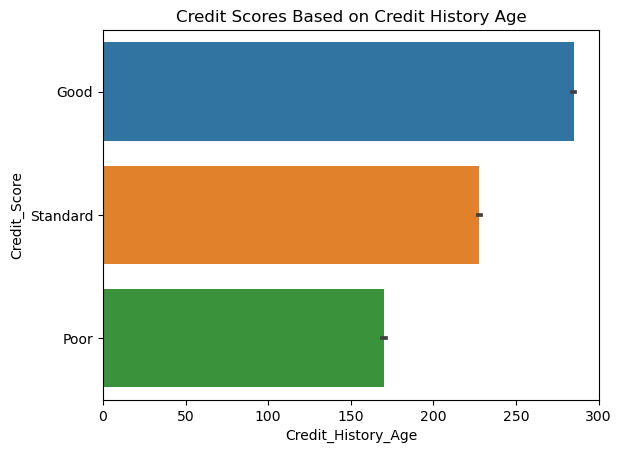

In [34]:
sns.barplot(x='Credit_History_Age', y='Credit_Score', data=data).set(title="Credit Scores Based on Credit History Age")

# ENCODING

In [35]:
#we have to change this credit_mix column to numeric if not algorithm will not run
data['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [36]:
data['Credit_Mix']=data["Credit_Mix"].map({"Standard": 0, "Good": 1, "Bad": 2})

In [37]:
data['Credit_Mix']

0        2
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Credit_Mix, Length: 100000, dtype: int64

In [38]:
le=LabelEncoder()
data['Occupation']=le.fit_transform(data['Occupation'])
data['Occupation']

0        12
1        12
2        12
3        12
4        12
         ..
99995     9
99996     9
99997     9
99998     9
99999     9
Name: Occupation, Length: 100000, dtype: int32

In [64]:
le1=LabelEncoder()
data['Credit_Score']=le.fit_transform(data['Credit_Score'])
data['Credit_Score']

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    2
99999    1
Name: Credit_Score, Length: 100000, dtype: int32

# customer segmentation and clustering

In [30]:
from sklearn.cluster import KMeans

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  int32  
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

# FEATURE SELECTION

In [65]:
x = np.array(data[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance","Occupation"]])
y = np.array(data[["Credit_Score"]])

In [67]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(75000, 13)
(25000, 13)
(75000, 1)
(25000, 1)


In [68]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.76316


In [69]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=15)
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.74132


In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear").fit(xtrain, ytrain)
roc_auc_score(ytrain, clf.predict_proba(xtrain), multi_class='ovr')
#print("ROCAUC:",roc_auc_score(ytest, y_pred))


C:\Users\vijiv\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7616399191186928

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

C:\Users\vijiv\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.81128


In [81]:
print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = input("Credit Mix (Bad: 0, Standard: 1, Good: 3) : ")
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))
m=float(input("Occupation: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l,m]])
print("Predicted Credit Score = ", model.predict(features))

Credit Score Prediction : 
Annual Income: 500000
Monthly Inhand Salary: 35000
Number of Bank Accounts: 2
Number of Credit cards: 1
Interest rate: 8
Number of Loans: 2
Average number of days delayed by the person: 0
Number of delayed payments: 0
Credit Mix (Bad: 0, Standard: 1, Good: 3) : 3
Outstanding Debt: 0
Credit History Age: 6
Monthly Balance: 10000
Occupation: 3
Predicted Credit Score =  [0]
